# DAV 6150 Project 2 - Clustering + SVM: Can We Predict Purchases from Web Sites?
Brian Livian, Alejandra Zapata, Ke Chen

## 1. Introduction 
The Online Shoppers Purchasing Intention Dataset will be used to cluster the similar data observations.The two groups will be labeled as revenue or not. After assigning the observations to each group, an SVM model will be constructed to predict the most likely categorization of any  unseen data items. Also, if the output of the SVM algorithm appears to be indicative of whether or not a web site visitor made a purchase will be discussed through the project.

The steps will be summarized as:

- 1. Import the data set and apply exploratory data analysis (EDA). 
- 2. Based on the EDA result, standardize or perform data scaling if needed. 
- 3. Apply a K-means clustering algorithm to label the observations into different groups. K selection will be determined by Dendrogram + elbow + silhouette plots.
- 4. Apply two feature selection methods to extract features for predicting the clustering algorithm labeled result.
- 5. Create 2 SVM models and compare the models.
- 6. Compare the prediction with the real purchase record.

First things first, the data set will be imported as a pandas data frame.

In [1]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# read data as data frame
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/Project2_Data.csv')

# check result
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


## 2. Pre-Clustering Exploratory Data Analysis
According to the introduction  of the data set from the source, https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#
The dataset consists of 10 numerical and 8 categorical attributes.

The **'Revenue'** attribute will be used as the class label, which is the response variable in the data modeling section.

**6 variables, "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action. These three variables are **numeric**.

The **"Bounce Rate", "Exit Rate" and "Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. According to the description, these three features are **numeric**. 

The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. It is **numeric**.

The data set also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year. Therefore, they will be taken as categorical data.

In [2]:
# get the data general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Total 17 columns were found in the dataset, which is different from the data source description. After investigation, the 'Revenue' column will be in a separate file which will be used in the modeling section. According to the data set info table, we can see the no missing values found. The first 10 columns match the data source description as numeric data, while the other 7 variables are categorical.

### 2.1 Numeric Variables

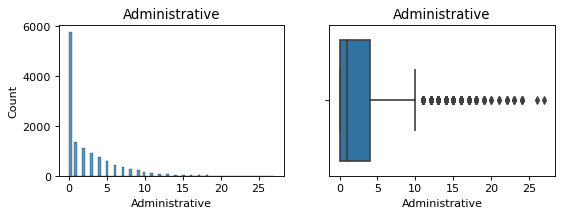

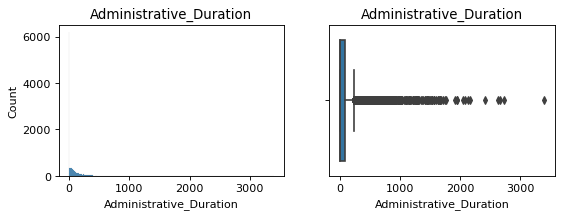

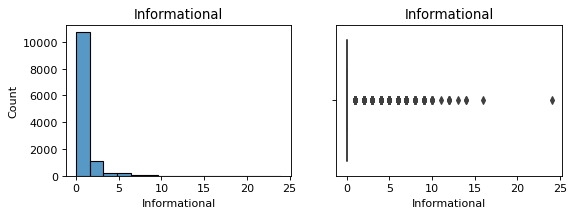

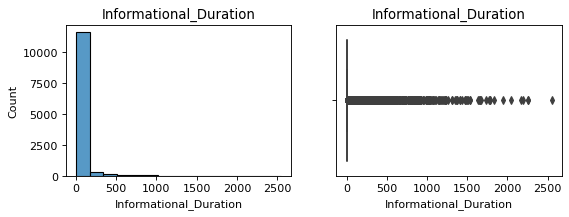

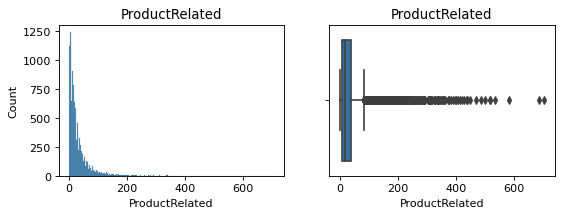

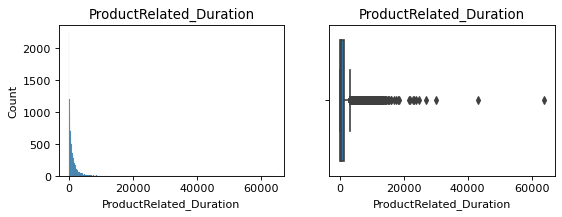

In [3]:
# Plot numeric web page related data
import seaborn as sns
for i in range(0,6):
    figure(figsize=(8, 2.5), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x= df.iloc[:,i])
    plt.title(df.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df.iloc[:,i])
    plt.title(df.columns[i])
    plt.show()

All the data are strongly right skewed. According to our own online purchase experience, it is understandable that people only view limited pages and stay on the same page for a certain amount of time rather than endless checking the webpage or staying on the same age for a long time. Therefore, the data will be mainly on the fewer pages and less duration. For the extreme values, some people may stay on the same page and don't touch it for a whole night. Due to the possible reasons, they would not be seen as real outliers.

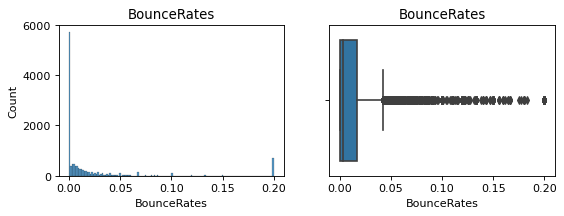

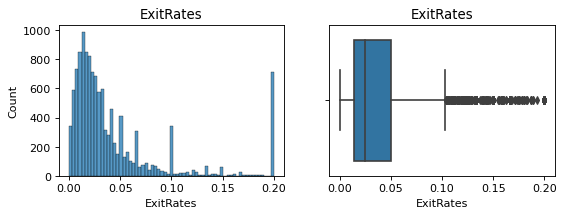

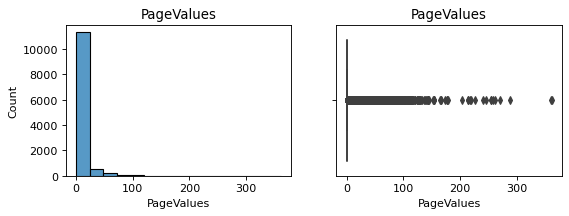

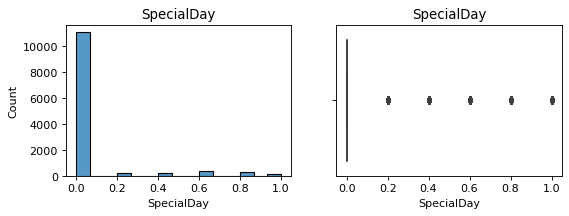

In [4]:
# Plot other numeric data
for i in range(6,10):
    figure(figsize=(8, 2.5), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x= df.iloc[:,i])
    plt.title(df.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df.iloc[:,i])
    plt.title(df.columns[i])
    plt.show()

These 4 features also showed a right skewed pattern. But the Bounce Rate and Exit Rate both showed a volume in the big percentage range. It does happen when web users mistakenly jump in the page. The page value is intended to give an idea of which page contributed more to the site revenue. Averagely, they all share a relatively lower value. Special days are always good seasons for shopping, the closer, the more customers.

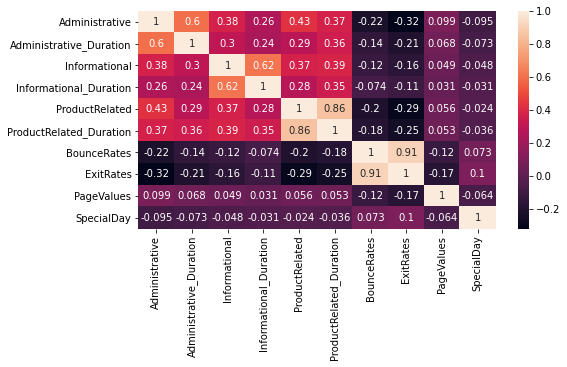

In [5]:
# select all the numeric variables
df_num=df.iloc[:,0:10]

# Heatmap of correlation
plt.figure(figsize=(8,4))
sns.heatmap(df_num.corr(), annot=True)
plt.show()

In [6]:
# correlation coefficient table
df_num.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000


From the heatmap, it is very obvious that the Bounce Rates and Exit Rates are highly correlated. We can have an idea that when modeling, it is probably keep only one of them. For the page type and view duration, it also shows a relatively higher correlation, especially ProductRelated and ProductRelated_Duration. So for feature selection, these two pairs of features will be manually fixed.

### 2.2 Categorical Variables

In [7]:
# select the categorical variables
df_cat=df.iloc[:,10:]
df_cat.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,May,1,1,1,2,New_Visitor,True
1,Mar,2,2,4,2,Returning_Visitor,False
2,Nov,2,2,9,2,New_Visitor,False
3,Nov,1,1,2,3,Returning_Visitor,False
4,May,2,2,3,4,Returning_Visitor,False


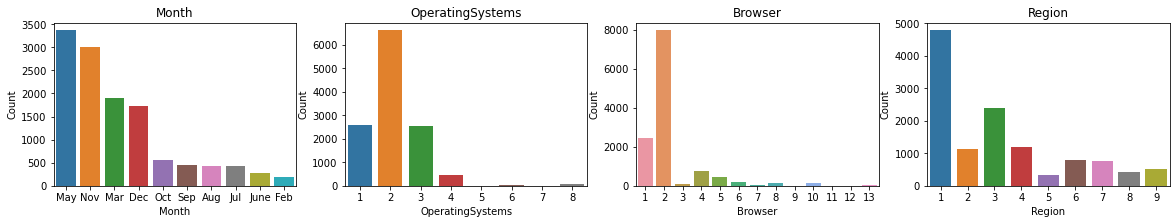

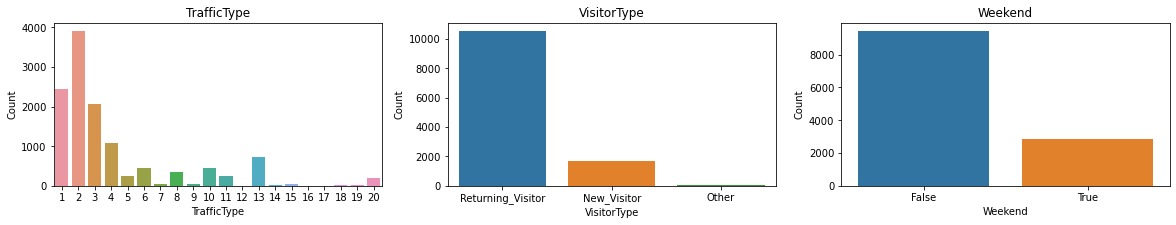

In [8]:
# Plot categorical data
figure(figsize=(20, 3))
for i in range(10,14):
    plt.subplot(1, 4, i-9)
    ax =sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    ax.set(xlabel=df.columns[i], ylabel='Count')
    plt.title(df.columns[i])

# variable number 10-12
figure(figsize=(20, 3))
for i in range(14,17):
    plt.subplot(1, 3, i-13)
    bx=sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    bx.set(xlabel=df.columns[i], ylabel='Count')
    plt.title(df.columns[i])

From the bar plots, we have a general overview of the data distribution on each categories. May and November have the most observations. Most observations use the Type 2 Operating system, Type 2 Browser and Type 2 Traffic Type. Region 1 has the most observations. Returning visitors population are strongly larger than new visitors. Most observations happened on weekdays. As the visitor type is imbalanced, it's probably not a good indicator to predict the revenue.

## 3. Pre-Clustering Data Preparation
Based on the EDA result, we see the skewness of numeric variables and some imbalance pattern in categorical variables. For data preparation, we need to do:
- 1. Create the new features.
- 2. Standardize the numeric variables;
- 3. Encode the categorical variables.

In [9]:
# standarize the numeric variables
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_num)
scaled = scaler.transform(df_num)
# change the scaled data to data frame
df_num_new=pd.DataFrame(scaled,columns=df_num.columns)

In [10]:
# change all categorical variables to object data type
df_cat=df_cat.astype('object') 
# encode the categorical variables, weekend_False will be a invalid column as only true or false
df_cat_new=pd.get_dummies(df_cat, prefix=None).drop(['Weekend_False'],axis=1)

In [11]:
# combine all transformed data into new data frame
df_new=pd.concat([df_num_new,df_cat_new],axis=1)
# check result
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,...,0,0,0,0,0,0,1,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,...,0,0,0,0,0,0,1,0,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0


Now all the data has been transformed.
## 4. Cluster Modeling
In this section, we will firstly conduct a hierarchical clustering to create a Dendrogram of the data set. Taken each observation as an individual cluster, apply an agglomerative algorithm to cluster them into different groups according to their similarity.

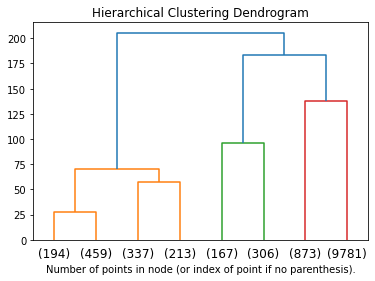

In [12]:
'''************************************************************************************ 
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
*************************************************************************************'''
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Apply hierarchy clustering on df_new
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_new)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top two levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Based on the Dendrogram, we can impose  3 clusters on the data set. Further, we can apply K-means clustering under different k values to create elbow plots to find suitable group numbers.

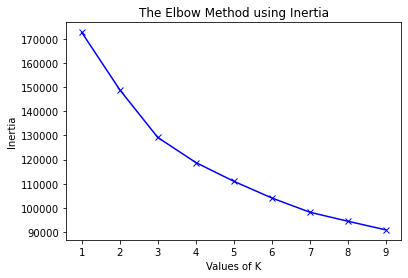

In [13]:
'''*****************************************************************
Cited from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
*****************************************************************'''
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

X=df_new

inertias = []
mapping = {}
K = range(1, 10)

for k in K:
# Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From the elbow plot, there is no very obvious elbow, but from the trend we can see, after k=3, the plot did not change as severely as before k=3 point, which we can seen as the not obvious elbow. So k=3 is a good choice. This is the same conclusion drew from the Hierarchical Clustering Dendrogram. Now we will try the silhouette plot.

In [14]:
'''***************************************************************************
Cited from https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb
*******************************************************************************'''
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
print(silhouette_scores)

[0.30548080968008406, 0.28886201632842073, 0.24691959587628853, 0.21550675343393516, 0.2213283998630285, 0.21725213303214824, 0.1313221180773241, 0.13461256816682027]


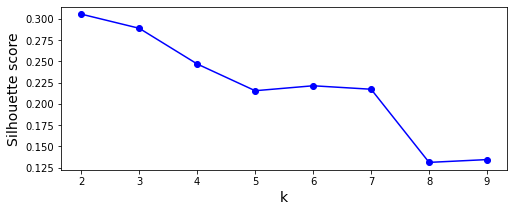

In [15]:
# plot the silhouette_scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

The silhouette coefficient at k=2 and k=3 are both over 0.27. Even though the score is still not close to +1, so far, these two k values will be the best choice. All the three methods show k=3 is a pretty good choice in this case.

## 5. Post-Clustering Exploratory Data Analysis
According to the instruction, we will apply k=2 for the clustering. The observations will be labeled as 2 groups.

In [16]:
# apply k=2 to label the observations
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_new)
# add a new column 'Revenue' in the dataframe
df_new['Revenue']=pd.DataFrame(kmeans.predict(df_new))
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,...,0,0,0,0,0,1,0,0,1,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,...,0,0,0,0,0,1,0,0,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0


[Text(0.5, 0, 'Revenue'), Text(0, 0.5, 'Count')]

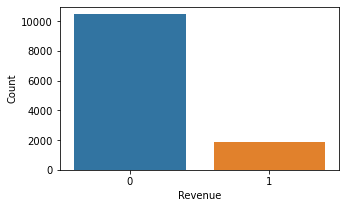

In [17]:
# plot the clustered result
figure(figsize=(5, 3))
cx=sns.barplot(x = df_new.iloc[:,-1].value_counts().index, y = df_new.iloc[:,-1].value_counts())
cx.set(xlabel='Revenue', ylabel='Count')

In [18]:
# show the exact counts
df_new.iloc[:,-1].value_counts()

0    10456
1     1874
Name: Revenue, dtype: int64

The clustering result shows most of the observations labeled as '0', which means no revenue. It is almost 5 times of the '1' labeled observations. It can be seen as imbalanced.

## 6. Clustering Output vs. Actual Labels

In [19]:
# read the other csv file containing the real information
df_label=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/Project2_Data_Labels.csv')
# add a new column to the data frame as 'V_Revenue'
df_new['V_Revenue']=df_label
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue,V_Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,...,0,0,0,0,1,0,0,1,0,True
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,...,0,0,0,0,0,0,1,0,0,False
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,...,0,0,0,0,1,0,0,0,0,False
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,...,0,0,0,0,0,0,1,0,0,False
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,...,0,0,0,0,0,0,1,0,0,False


In [20]:
# convert the 'V_Revenue' column to integers for comparison with 'Revenue'
df_new["V_Revenue"] = df_new["V_Revenue"].astype(int)

In [21]:
# apply crosstab to compare the clustered result and the really revenued column
crosstab = pd.crosstab(df_new['Revenue'], df_new['V_Revenue'])
crosstab

V_Revenue,0,1
Revenue,,
0,9070,1386
1,1352,522


From the crosstab result, we can see the output of the clustering algorithm only shows 9070+522=9592 observations the same as the real purchased data. The other 1386+1352=2738 observations are not the same. The same rate is only 77.7%. Therefore, it is hard to say the output of the clustering algorithm appears to be indicative of whether or not a web site visitor made a purchase.

## 7. SVM Modeling
In this section, 2 kinds of feature selection method will be used to select 2 groups of features for modelling. The feature selection methods include:
- 1. Random Forest
- 2. Mutual Information

In [22]:
# set the explanatory variables and response variable
X = df_new.iloc[:,0:74]
# output of clustering algorithm, response variable
y1 = df_new.iloc[:,74]
# real labels
y2 = df_new.iloc[:,75]

### 7.1 Model Based on Random Forest Feature Selection

In [23]:
'''**********************************
Code was from https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
**************************************'''
# import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
# split the training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y1,test_size=0.2)

# apply the feature selection
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')


The result shows 9 features were selected. However, based on the assumption in EDA, BounceRates and ExitRates are highly correlated. Therefore, we will apply only BounceRates for the following modelling. It is also applied on ProductRelated and ProductRelated_Duration variables. Here we will reduce ProductRelated_Duration. Now totally 7 features will be in this model.

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

# define a vector containing the names of the attributes to use
X_RF = df_new[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'BounceRates',  'PageValues']]
y = y1
from sklearn.model_selection import train_test_split
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y, test_size=0.2)

# set the model
SVM_RF = SVC(kernel='linear')

# import the cross_val_score function
from sklearn.model_selection import cross_val_score
scores_RF_acc = cross_val_score(SVM_RF, X_RF_train, y_RF_train, cv=5, scoring='accuracy')
scores_RF_pre = cross_val_score(SVM_RF, X_RF_train, y_RF_train, cv=5, scoring='precision')
scores_RF_recall = cross_val_score(SVM_RF, X_RF_train, y_RF_train, cv=5, scoring='recall')
scores_RF_f1 = cross_val_score(SVM_RF, X_RF_train, y_RF_train, cv=5, scoring='f1')
scores_RF_AUC = cross_val_score(SVM_RF, X_RF_train, y_RF_train, cv=5, scoring='roc_auc')

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores_RF_acc.mean())
print (scores_RF_pre.mean())
print (scores_RF_recall.mean())
print (scores_RF_f1.mean())
print (scores_RF_AUC.mean())

0.986212499575918
0.9593929279260894
0.9490920518057957
0.954175141283882
0.9985387631340348


### 7.2 Model Based on Mutual Information

In [25]:
'''**********************************
https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028
*************************************'''
# import libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
# define the variables

y= y1
# split variables
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)

# apply feature selection
sel_classif = SelectKBest(mutual_info_classif, k=5)
X_train_mutual = sel_classif.fit_transform(X_train, y_train)
print(sel_classif.get_support())

selected_feat_classif= X_train.columns[(sel_classif.get_support())]
print(selected_feat_classif)

[ True  True  True False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration'],
      dtype='object')


From the result above, we got another group of features. Now only 5 features were selected. Due to the high correlation of ProductRelated and ProductRelated_Duration, we will keep only one of them as the model 7.1.

In [26]:
# define a vector containing the names of the attributes to use
X_SKB = df_new[['Administrative', 'Informational','Informational_Duration','ProductRelated']]
y= y1
from sklearn.model_selection import train_test_split
X_SKB_train, X_SKB_test, y_SKB_train, y_SKB_test = train_test_split(X_SKB, y, test_size=0.2)

SVM_SKB = SVC(kernel='linear')

# import the cross_val_score function
from sklearn.model_selection import cross_val_score
scores_SKB_acc = cross_val_score(SVM_SKB, X_SKB_train, y_SKB_train, cv=5, scoring='accuracy')
scores_SKB_pre = cross_val_score(SVM_SKB, X_SKB_train, y_SKB_train, cv=5, scoring='precision')
scores_SKB_recall = cross_val_score(SVM_SKB, X_SKB_train, y_SKB_train, cv=5, scoring='recall')
scores_SKB_f1 = cross_val_score(SVM_SKB, X_SKB_train, y_SKB_train, cv=5, scoring='f1')
scores_SKB_AUC = cross_val_score(SVM_SKB, X_SKB_train, y_SKB_train, cv=5, scoring='roc_auc')

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores_SKB_acc.mean())
print (scores_SKB_pre.mean())
print (scores_SKB_recall.mean())
print (scores_SKB_f1.mean())
print (scores_SKB_AUC.mean())

0.9711069005612277
0.930843164316449
0.8775447281570262
0.903295465955772
0.9906120494621755


## 8. Select Models
Comparing to the score above, we could make the below intuitive table:

| Metric        | Model 7.1 | Model 7.2 
| ------------- | ------- | ------- 
| # Indep. Vars |  7     |   4     
| Accuracy      | 0.986  | 0.971 
| Precision     | 0.959  | 0.931 
| Recall        | 0.949  | 0.878  
| F1 Score      | 0.954  | 0.903  
| AUC           | 0.999  | 0.991  

The total 17 features were reduced to 7 features for the first model, and 4 features for the second model. As the first model contains more features than the second model, the score of all metrics are a little bit higher than the second model. Even though the accuracy and precision do not show too much difference, the recall, F1 score showed a nearly 0.5 difference between the two models. As to the imbalance of response variables, a higher recall is more important than the accuracy, therefore we prefer the first model with 7 features selected by random forest.

In [27]:
# use the training set fit the model
SVM_RF.fit(X_RF_train, y_RF_train)
# get the predicted values of y
y_pred = SVM_RF.predict(X_RF_test)

# check the accuracy and precision on the testing set
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
print("Accuracy:", accuracy_score(y_RF_test, y_pred))
print("Precision:", precision_score(y_RF_test, y_pred))
print("Recall:", recall_score(y_RF_test, y_pred))
print("f1:", f1_score(y_RF_test, y_pred))
print("AUC:", roc_auc_score(y_RF_test, y_pred))


Accuracy: 0.986212489862125
Precision: 0.9553805774278216
Recall: 0.9553805774278216
f1: 0.9553805774278216
AUC: 0.973613550104798


After applying the model to the testing set, all metric scores are above 0.95. It means the model fits well on the testing set.
## 9. Clustering + SVM Output vs. Actual Labels
In this section, we are going to use the selected model to generate all the predicted result of Revenue. Then compare the prediction with the real V_Revenue data.

In [28]:
# predict revenue
Revenue_predict = SVM_RF.predict(X_RF)
# convert to data frame
df_Revenue_predict=pd.DataFrame(Revenue_predict,columns=['Predict_Rev'])
df_Revenue_predict.head()

,Predict_Rev
0,0
1,0
2,0
3,0
4,0


In [29]:
# crosstab of predicted values and real data
crosstab_9 = pd.crosstab(Revenue_predict, df_new['V_Revenue'])
crosstab_9

V_Revenue,0,1
row_0,,
0,9077,1403
1,1345,505


From the crosstab result, we can see the output of the SVM prediction result shows 9077+505=9582 observations the same as the real purchased data. The other 1345+1403=2748 observations are not the same. The same rate is only 77.71%. This is similar to the result of clustering labeled situation. Therefore, it is still hard to say the output of the clustering algorithm appeasr to be indicative of whether or not a web site visitor made a purchase.

## 10. Conclusions
As the K-means clustering algorithm and SVM are all distance based modeling algorithm, the SVM can reach a very high performance on predicting the K-means clustering labeled result, with only 7 features. However, both the clustering result and the SVM model prediction appears to be NOT indicative of whether a web site visitor made a purchase. The 2 clusters are not directly reflect the real purchase or not situation.

## References
https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb<br>
https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028<br>
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/<br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html<br>
